In [81]:
import geopandas

gdf = geopandas.read_file("/content/sydney.geojson")
gdf.head(1)

,SSC_CODE,SSC_NAME,CONF_VALUE,SQKM,geometry
0,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8..."


In [82]:
import pandas as pd
# df = pd.read_csv("/content/zomato_df_final_data.csv")

df = geopandas.read_file('/content/zomato_df_final_data.csv', GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO")

In [83]:
df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
df['lng'] = pd.to_numeric(df['lng'], errors='coerce')

In [84]:
df = df.dropna(subset=['lat', 'lng'])

In [85]:
from shapely.geometry import Point

df['geometry'] = df.apply(lambda row: Point(row['lng'], row['lat']), axis=1)
df.head()


,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color,geometry
0,"371A Pitt Street, CBD, Sydney",50,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4,Very Good,CBD,Sydney Madang,['Casual Dining'],1311,FALSE,#e15307,5.243902439,#6f706b,POINT (151.20760 -33.87606)
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236,FALSE,#9c3203,7.56097561,#6f706b,POINT (151.19379 -33.91100)
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227,FALSE,#7f2704,10.6504065,#6f706b,POINT (151.19521 -33.86797)
3,"Sydney Opera House, Bennelong Point, Circular...",270,['Modern Australian'],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",278,FALSE,#7f2704,22.23577236,#4186f4,POINT (151.21530 -33.85678)
4,"20 Campbell Street, Chinatown, Sydney",55,"['Thai', 'Salad']",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,['Casual Dining'],2150,FALSE,#a83703,5.630081301,#6f706b,POINT (151.20641 -33.87904)


<Axes: >

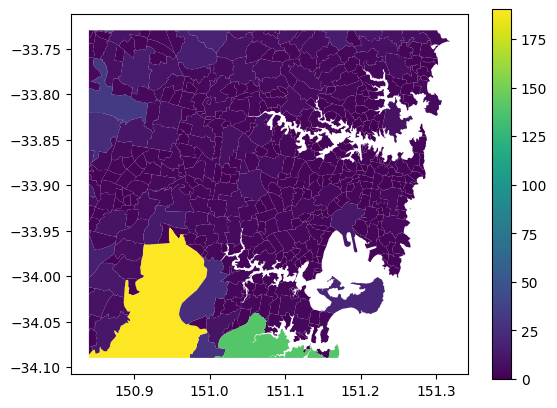

In [86]:
gdf.plot("SQKM", legend=True)

In [106]:
result = geopandas.sjoin(df, gdf, how='right', op='within')
result.head(1)


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-106-ff2a1a4844b3>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  result = geopandas.sjoin(df, gdf, how='right', op='within')


,index_left,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,...,votes,groupon,color,cost_2,cuisine_color,SSC_CODE,SSC_NAME,CONF_VALUE,SQKM,geometry
0,2697.0,"745-899 Elizabeth Drive, Bonnyrigg, Sydney",130,"['Italian', 'Pizza', 'Tapas']",-33.88126,https://www.zomato.com/sydney/amorettis-bonnyrigg,150.859422,02 8786 1777,3.3,Average,...,65,FALSE,#fd9243,11.42276423,#6f706b,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8..."


In [112]:
result["cuisine"] = result["cuisine"].astype(str)

<Axes: >

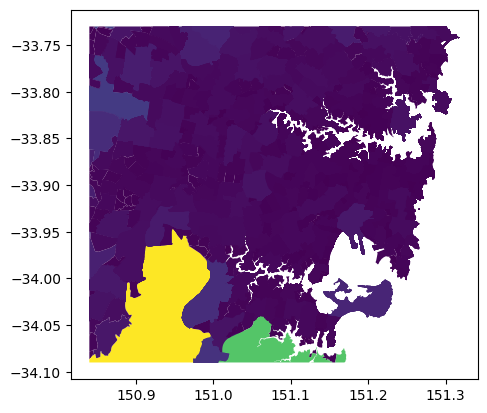

In [118]:
result.plot("SQKM")

In [108]:
if "Italian" in result["cuisine"][0]:
  print("Italian found")

In [109]:
target_cuisine = 'Indian'

In [110]:
result['has_cuisine'] = result['cuisine'].apply(lambda x: 1 if target_cuisine in x else 0)

TypeError: ignored

In [91]:
result.head(1)

,index_left,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,...,votes,groupon,color,cost_2,cuisine_color,SSC_CODE,SSC_NAME,CONF_VALUE,SQKM,geometry
0,2697.0,"745-899 Elizabeth Drive, Bonnyrigg, Sydney",130,"['Italian', 'Pizza', 'Tapas']",-33.88126,https://www.zomato.com/sydney/amorettis-bonnyrigg,150.859422,02 8786 1777,3.3,Average,...,65,FALSE,#fd9243,11.42276423,#6f706b,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8..."


/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


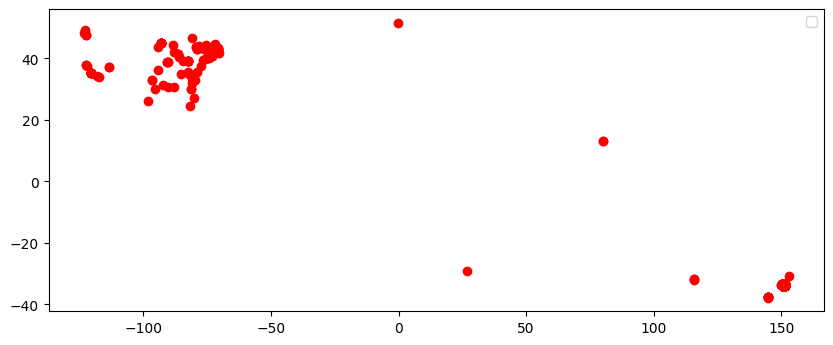

In [47]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(10, 10))

# # Create two layers: one for suburbs with the specified cuisine and one for the rest
# result[result['has_cuisine'] == 1].plot(column='SQKM', ax=ax, color='red', legend=True, label='Suburbs with Cuisine')
# result[result['has_cuisine'] == 0].plot(column='SQKM', ax=ax, color='white', legend=True, label='Other Suburbs')

# # Customize the plot, such as adding a title and legend
# ax.set_title(f'Suburbs with {target_cuisine} Cuisine')
# ax.legend()

# # Show the plot
# plt.show()
fig, ax = plt.subplots(figsize=(10, 10))
result.plot("SQKM", legend = True, ax=ax, color='red')
gdf.plot("SQKM", legend = True, ax=ax, color='white')
ax.legend()

# Show the plot
plt.show()

In [66]:
temp = result[result["has_cuisine"] == 1]
temp.head(1)

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,...,color,cost_2,cuisine_color,geometry,index_right,SSC_CODE,SSC_NAME,CONF_VALUE,SQKM,has_cuisine
81,"80 Pyrmont Street Pyrmont, \tPyrmont",100,"['Asian', 'Italian', 'Seafood', 'Indian']",-33.867971,https://www.zomato.com/sydney/harvest-buffet-p...,151.19521,02 8317 6335,3.6,Good,"The Star, Pyrmont",...,#f57622,9.105691057,#6f706b,"POLYGON ((151.19621 -33.86797, 151.19621 -33.8...",360.0,11923,Pyrmont,Very good,0.93258,1


In [67]:
temp['geometry'] = temp['geometry'].buffer(buffer_distance)
temp.head(1)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,...,color,cost_2,cuisine_color,geometry,index_right,SSC_CODE,SSC_NAME,CONF_VALUE,SQKM,has_cuisine
81,"80 Pyrmont Street Pyrmont, \tPyrmont",100,"['Asian', 'Italian', 'Seafood', 'Indian']",-33.867971,https://www.zomato.com/sydney/harvest-buffet-p...,151.19521,02 8317 6335,3.6,Good,"The Star, Pyrmont",...,#f57622,9.105691057,#6f706b,"POLYGON ((151.19721 -33.86792, 151.19721 -33.8...",360.0,11923,Pyrmont,Very good,0.93258,1


/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


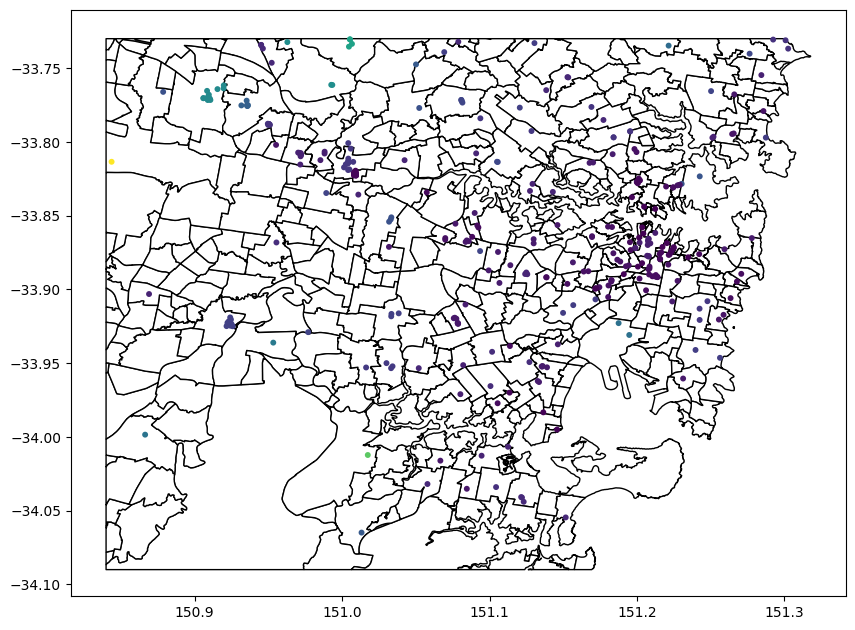

In [76]:
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(column="SQKM", legend=True, ax=ax, edgecolor='black', color='white')
temp.plot(column = "SQKM", ax=ax)
plt.show()

<Axes: >

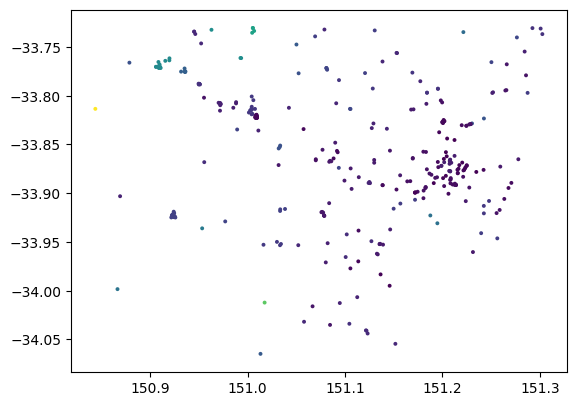

In [73]:
temp.plot(column = "SQKM")

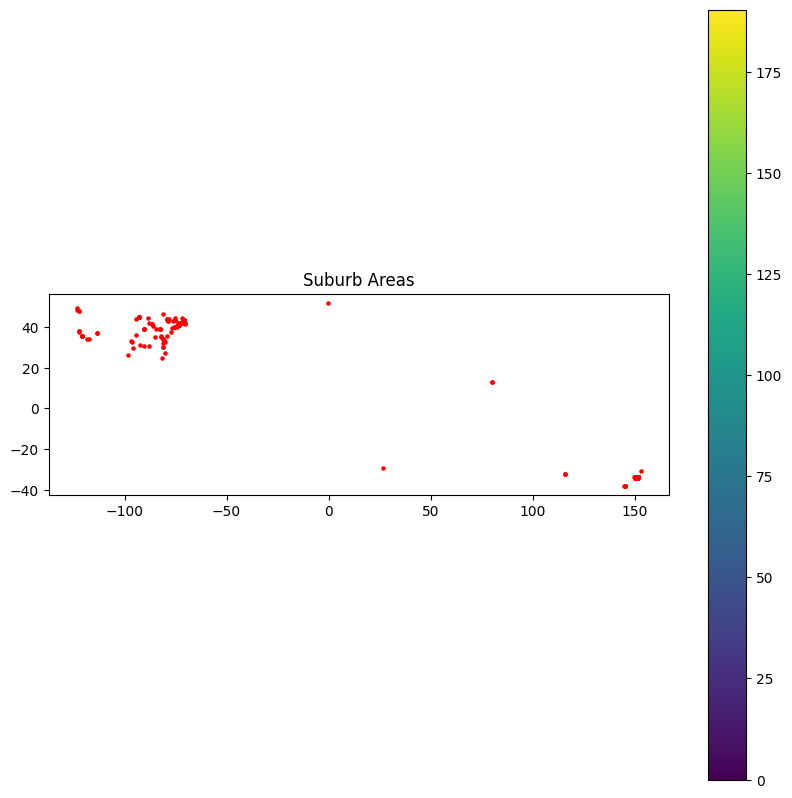

In [61]:
# #gdf.plot(column="SQKM", legend=True, color="white", edgecolor="black")
# # temp.plot(column="SQKM", legend=True, color="white", edgecolor="black")
# # fig, ax = plt.subplots(figsize=(10, 10))
# # gdf.plot(column="SQKM", legend=True, ax=ax, color="white", edgecolor="black")

# # result.plot(ax=ax, color='red', edgecolor='black')

# # Show the plot
# # plt.show()
# import matplotlib.pyplot as plt

# # Create a Matplotlib figure and axis
# fig, ax = plt.subplots(figsize=(10, 10))

# # Plot the "gdf" GeoDataFrame with the "SQKM" column as the base layer
# gdf.plot(column="SQKM", legend=True, ax=ax, edgecolor='black', cmap='viridis')

# # Plot the "result" GeoDataFrame points on top
# result.plot(ax=ax, color='red', marker='o', markersize=5)

# # Customize the plot, such as adding a title
# ax.set_title('Suburb Areas')

# # Show the plot
# plt.show()